In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,Conv2D,MaxPooling2D,AveragePooling2D,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
# Generator
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/kaggle/input/dogs-vs-cats/dataset/training_set/",
    labels="inferred",
    label_mode = "int",  # this will assign cat 0 dog 1
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/kaggle/input/dogs-vs-cats/dataset/test_set/",
    labels="inferred",
    label_mode = "int",  # this will assign cat 0 dog 1
    batch_size = 32,
    image_size = (256,256)
)


Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


# The above data is in format of numpy so basically they are stored in 255.so we need to normalized into 0 & 1

In [3]:
# Normalize

def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [4]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [6]:
model.compile(optimizer='Adam',loss="binary_crossentropy",metrics=['accuracy'])

In [7]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
250/250 [==============================] - 68s 194ms/step - loss: 1.1180 - accuracy: 0.5554 - val_loss: 0.8011 - val_accuracy: 0.5290
Epoch 2/10
250/250 [==============================] - 30s 115ms/step - loss: 0.6910 - accuracy: 0.6010 - val_loss: 0.6256 - val_accuracy: 0.6490
Epoch 3/10
250/250 [==============================] - 28s 109ms/step - loss: 0.5985 - accuracy: 0.6781 - val_loss: 0.7002 - val_accuracy: 0.5535
Epoch 4/10
250/250 [==============================] - 28s 110ms/step - loss: 0.5349 - accuracy: 0.7305 - val_loss: 0.5177 - val_accuracy: 0.7335
Epoch 5/10
250/250 [==============================] - 27s 108ms/step - loss: 0.4653 - accuracy: 0.7832 - val_loss: 0.4923 - val_accuracy: 0.7550
Epoch 6/10
250/250 [==============================] - 28s 110ms/step - loss: 0.4228 - accuracy: 0.8096 - val_loss: 0.5110 - val_accuracy: 0.7590
Epoch 7/10
250/250 [==============================] - 29s 111ms/step - loss: 0.3598 - accuracy: 0.8410 - val_loss: 0.4808 - val_ac

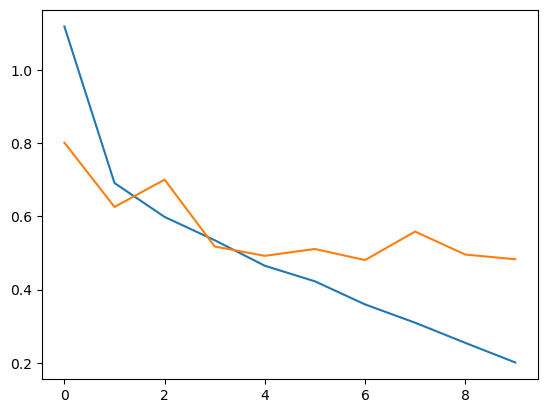

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

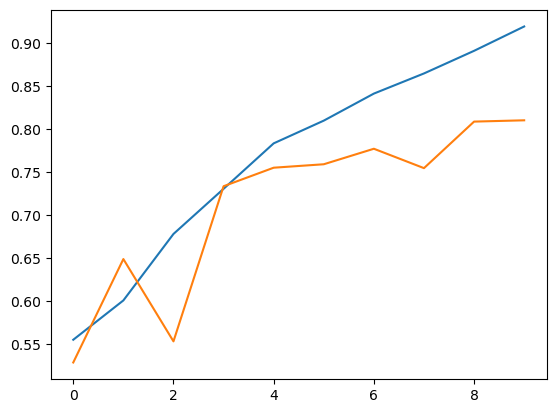

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [10]:
import cv2

In [11]:
test_img = cv2.imread("/kaggle/input/dogs-vs-cats/dataset/sample/cat_or_dog_1.jpg")

AxesImage(size=(720, 960))


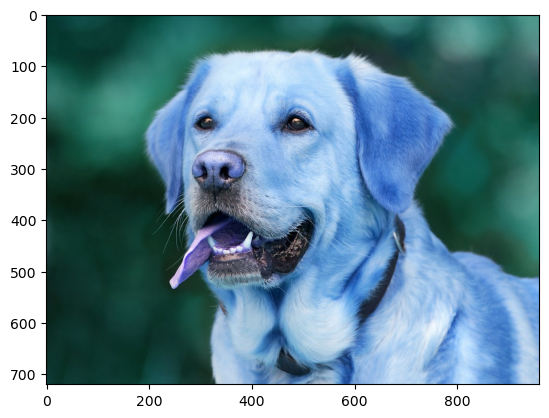

In [12]:
print(plt.imshow(test_img))

In [13]:
test_img.shape

(720, 960, 3)

In [14]:
test_img = cv2.resize(test_img,(256,256))

In [15]:
test_input = test_img.reshape((1,256,256,3))

In [16]:
model.predict(test_input)

1/1 [==============================] - 0s 371ms/step


array([[1.]], dtype=float32)